# Project 2 - Machine Learning

Students: Joel Jonassi 19698
        Rui Alves 15505
Teacher: Joaquim Silva

DataSet Link : https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Introduction
For this job will analise the California house environment...
Note: Underfiting if the training error and error testing high
Overfitting if error training is low or accurancy high and error testing low or accurancy high

### Imports side

In [241]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

### DataSet reading

In [77]:
df = pd.read_csv("dataset/housing2.csv")

## Automatic Classification

Objetives:
 * Try do predict if the house is near to the beach or not

### Data prepare

We consider the all  the dataset attributes important to train the model to predict if the house is near to the beach or not.
We use a whole dataset composed of 10 attributes, 9 of which are for testing and 1 for the model to predict "target attribute":
* latitude and longitude - we use this two variables to helps ous finding the location of the houses.
* house_median_age - this attribute helps our model to predict the age of the house and try make a decision according to other attributes in the dataset if the house is near to the beach or not.
* total_rooms and total - we find these variables important to train the model cause can tells ous how many rooms are near to the beach as we know near to the beach has many houses/rooms for tourism.
* population - Can have a correlation between population and proximity to the beach
* house_hold - we assume that the household can influence the proximity to the beach or not.
* median_icome and median_house_value - these two variables we assume that are essential to predict if the house is near the beach cause people with with higher purchasing power are more likely to live there because the cost of living in these areas is expensive.
* ocean_proximity - This is the target attribute, we will use two algorithms to predict the ocean proximity namely Decision Random Forest Algorithm and Tree Classifier.

=SE(J2="NEAR OCEAN",20,SE(J2="NEAR BAY",30,SE(J2="ISLAND",10,SE(J2="<1H OCEAN",40,50))))

### Random Forest Algorithm

In [81]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean') 


data = df.iloc[: , :] # All data

X = data.iloc[ :, : -2].values # Use all columns except de 2 last one
# transform dor null variables
imp.fit(X)

X = imp.transform(X)
Y = data.iloc[ :, 9].values # Target

# Transform proximty of sea in to a number
#labelencoder = LabelEncoder()
#y = labelencoder_y.fit_transform(Y)

# Null variables  - verify
#print("Null variables\n", data.isnull().sum())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#Using random forest classifier
classifier = RandomForestClassifier() 
classifier = classifier.fit(X_train, Y_train) # model creation
predicted = classifier.predict(X_test) # model evaluation

#Results
print ('Confusion Matrix :')
print(confusion_matrix(Y_test, predicted))
print('Accuracy Score :', accuracy_score(Y_test, predicted))
print('Report : ')
print(classification_report(Y_test, predicted))

Confusion Matrix :
[[2708   35    0    4   20]
 [  29 1943    0    3    0]
 [   0    0    0    0    3]
 [   3    0    0  659    6]
 [  38    1    0   12  728]]
Accuracy Score : 0.9751291989664083
Report : 
              precision    recall  f1-score   support

   <1H OCEAN       0.97      0.98      0.98      2767
      INLAND       0.98      0.98      0.98      1975
      ISLAND       0.00      0.00      0.00         3
    NEAR BAY       0.97      0.99      0.98       668
  NEAR OCEAN       0.96      0.93      0.95       779

    accuracy                           0.98      6192
   macro avg       0.78      0.78      0.78      6192
weighted avg       0.97      0.98      0.97      6192



C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefin

### Decision Tree Classifier

In [80]:
DTC = DecisionTreeClassifier().fit(X_train, Y_train) # model creation
predicted = DTC.predict(X_test) # model evaluation
print('confusion Matrix')
print(confusion_matrix(Y_test, predicted))
print('Accuracy Score : ', accuracy_score(Y_test, predicted))
print("Report: ")
print(classification_report(Y_test, predicted))

confusion Matrix
[[2704   26    0    5   32]
 [  31 1944    0    0    0]
 [   0    0    3    0    0]
 [   5    0    0  657    6]
 [  31    0    0    8  740]]
Accuracy Score :  0.9767441860465116
Report: 
              precision    recall  f1-score   support

   <1H OCEAN       0.98      0.98      0.98      2767
      INLAND       0.99      0.98      0.99      1975
      ISLAND       1.00      1.00      1.00         3
    NEAR BAY       0.98      0.98      0.98       668
  NEAR OCEAN       0.95      0.95      0.95       779

    accuracy                           0.98      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.98      0.98      0.98      6192



## Results Analysis
At this section we will discuss a classification Accuracy. 
The classification accuracy is the ratio of number of correct predictions to the total number of input samples.

As we can see int the confusion matrix of these two algorithms RandomForest and DecisionTree it´s clearly that one is better than the other.


### Root of Mean Square Error (`rms_error`)

This is the square root of `Mean Square Error`.

## Cluster with K-Means

Objetives:
 * Classify the zones where the people with the highest purchasing power reside by ticket price. 

### Data prepare

In [119]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

X = df.loc[:, ["median_house_value", "latitude", "longitude"]]
X.head()



C:\Users\Asus\AppData\Local\Temp\ipykernel_8692\3040802256.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,median_house_value,latitude,longitude
0,452600,37.88,-122.23
1,358500,37.86,-122.22
2,352100,37.85,-122.24
3,341300,37.85,-122.25
4,342200,37.85,-122.25


In [120]:
# Create cluster feature
kmeans = KMeans(n_clusters=2)

X["Cluster"] = kmeans.fit_predict(X)

X["Cluster"] = X["Cluster"].astype("category")

X.head()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,median_house_value,latitude,longitude,Cluster
0,452600,37.88,-122.23,0
1,358500,37.86,-122.22,0
2,352100,37.85,-122.24,0
3,341300,37.85,-122.25,0
4,342200,37.85,-122.25,0


A scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas.

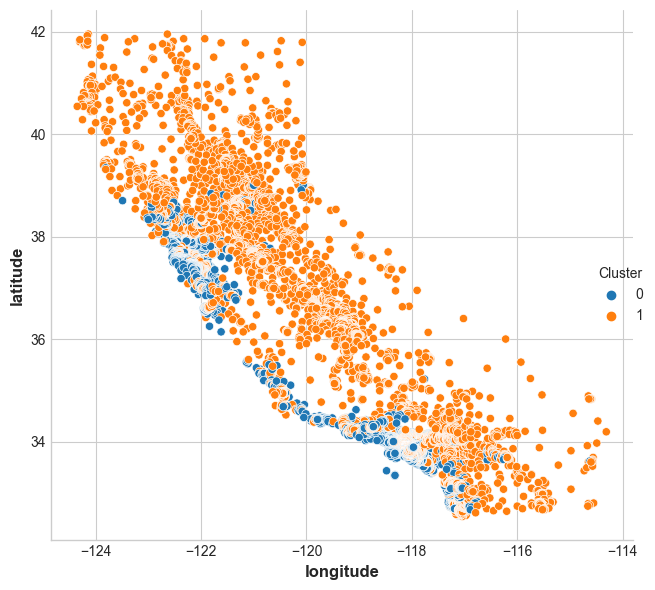

In [121]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

The target in this dataset is median_house_value (median house value). These box-plots show the distribution of the target within each cluster.

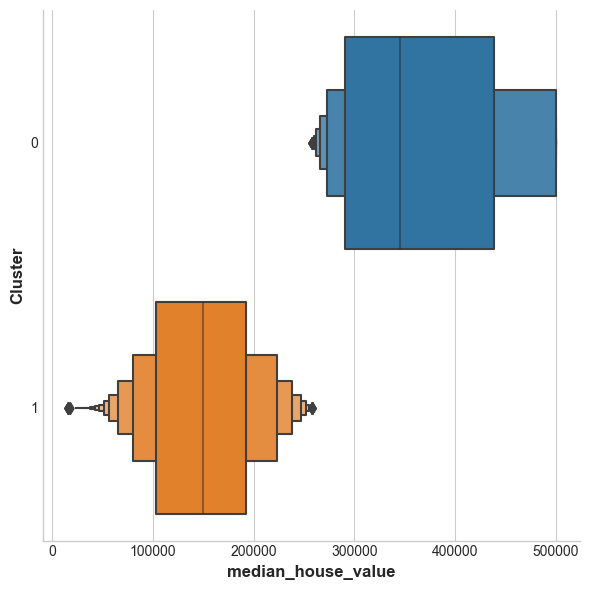

In [123]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6)

## Association rules

Objetives:
* Knowing whether or not you are close to the beach, determine the price of the house.

### Data Prepare
Add numerical column for ocean proximity

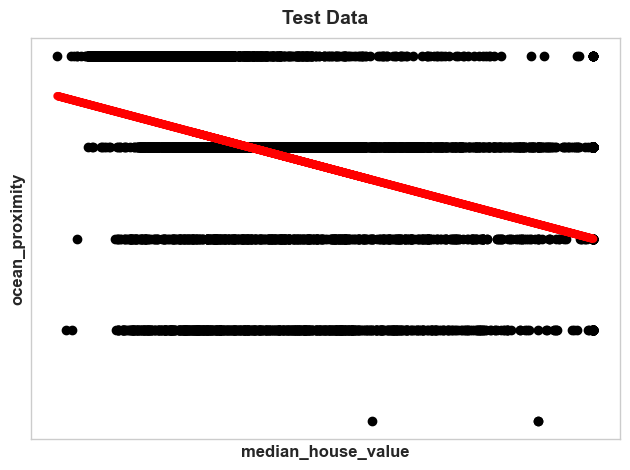

R^2:  0.1460810073697416
R^2 :  0.14856750808041919


In [91]:
#X = df['median_house_value']
#Y = df['ocean_proximity_attr'] #target

#Y = df['housing_median_age']

data = df.iloc[: , :] # All data

X = data.iloc[ :, 8].values # median_house_value
# transform dor null variables
#imp.fit(X)
#X = imp.transform(X)
Y = data.iloc[ :, 10].values # Target

# Transform proximty of sea in to a number
#labelencoder = LabelEncoder()
#y = labelencoder_y.fit_transform(Y)

# Null variables  - verify
#print("Null variables\n", data.isnull().sum())
X = X.reshape(len(X), 1)
Y = Y.reshape(len(Y), 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)



#Split data to train and validation
#tot_train_X = int(len(X) * 0.7 + 1)
#tot_train_Y = int(len(Y) * 0.7 + 1)

#Train Data
#X_train = X[ : -tot_train_X]
#Y_train = Y[ : -tot_train_Y]

#Validation Data
#X_test = X[-tot_train_X : ]
#Y_test = Y[-tot_train_Y : ]


#plot

plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.xticks(())
plt.yticks(())

#Create Linear regression object
regr = linear_model.LinearRegression()

#train the model using the training sets
regr.fit(X_train, Y_train) # model creation


#Plot outputs (model evaluation)
#By house price- predict a ocean proximity
plt.plot(X_test, regr.predict(X_test), color='red', linewidth=6)
plt.show()
print("R^2: ", regr.score(X_train, Y_train))
print("R^2 : ", regr.score(X_test, Y_test))


In [270]:
df = pd.read_csv("dataset/test.csv")
df.head()

,housing_median_age,ocean_proximity
0,"30,40AGE",NEAR BAY
1,"20,30AGE",NEAR BAY
2,"40,50AGE",<1H OCEAN
3,"30,40AGE",NEAR OCEAN
4,"30,40AGE",NEAR OCEAN


In [271]:
records = []
for i in range(0, len(df)):
    records.append([str(df.values[i, j]) for j in range(0, 2)])



In [279]:
from sklearn.decomposition import PCA
housing_features_pca = PCA(1)
X_select  = df.loc[:,['total_rooms','total_bedrooms', 'population','households']]
houdfsing['rb/hp']=housing_features_pca.fit_transform(X_select) 
print (housing_features_pca.explained_variance_ratio_) ## 1 Principal Component >> 95% var of data, Good enough.
## New df with combined features: 
housing_redu = housing.drop(columns=['total_rooms', 'total_bedrooms','population', 'households'])


def label_HousingPrice (row):
    if row['median_house_value'] <= 150e3 :
        return 'Cheap'
    elif row['median_house_value'] <=300e3 :
        return 'Nominal'
    elif row['median_house_value'] <=400e3 :
        return 'Expensive'
    else:
        return 'VeryExpensive'
housing_play = housing_redu.copy()
housing_play['PriceCatg'] = housing_redu.apply (lambda row: label_HousingPrice (row),axis=1)

NameError: name 'housing' is not defined

In [272]:
association_rules = apriori(df, min_support=0.0045, min_confidence=0.3, min_lift=3, min_length=2)
association_results = list(association_rules)

TypeError: apriori() got an unexpected keyword argument 'min_confidence'

In [244]:
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    if(len(items) == 2):
        print("Rule:" + items[0] + "->" + items[1]  )
        print("Suport: "+ str(item[1]))
        print("Confidence: "+ str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
                          
                          
                          
                          
                          
                          






Rule:INLAND->10,20AGE
Suport: 0.05263157894736842
Confidence: 1.0
Lift: 3.166666666666667
Rule:NEAR OCEAN->30,40AGE
Suport: 0.10526315789473684
Confidence: 0.4
Lift: 3.8000000000000003
Rule:<1H OCEAN->40,50AGE
Suport: 0.05263157894736842
Confidence: 0.5
Lift: 4.75


In [273]:
te = TransactionEncoder()
ta = te.fit(records).transform(records)

d = pd.DataFrame(ta, columns=te.columns_)
d


,"20,30AGE","30,40AGE","40,50AGE",<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,False,True,False,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,True,False,False,False
3,False,True,False,False,False,False,True
4,False,True,False,False,False,False,True
5,True,False,False,False,True,False,False
6,True,False,False,False,True,False,False
7,False,True,False,False,True,False,False
8,False,True,False,False,False,True,False


In [275]:
fs = apriori(d, min_support=0.6, use_colnames=False)
fs

,support,itemsets


In [277]:
AR = association_rules(d, metric='confidence', min_threshold=0.7)

ValueError: Dataframe needs to contain the                         columns 'support' and 'itemsets'

# Result Analysis

# Conclusion